# Discovering Spatial Periodic Frequent patterns in Big Data Using PFS_ECLAT Algorithm

In this tutorial, we will discuss two approaches to find Spatial Periodic Frequent patterns in big data using top algorithm.

1. [__Basic approach:__](#basicApproach) Here, we present the steps to discover Spatial Periodic Frequent patterns using a single minimum support value
2. [__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Spatial Periodic Frequent patterns using multiple minimum support values.

***

## <a id='basicApproach'>Basic approach: Executing PFS_ECLAT on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the PFS_ECLAT algorithm

In [1]:
from PAMI.periodicFrequentSpatialPattern import PFS_ECLAT  as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'
neighborFile='T10_utility_neighbour.txt'
minimumSupportCount=100  #Users can also specify this constraint between 0 to 1.
maxmunPeriodCount=5000
seperator='\t'       

#### Step 3: Execute the PFS_ECLAT algorithm

In [3]:
obj = alg.PFS_ECLAT(iFile=inputFile, minSup=minimumSupportCount,maxPer=maxmunPeriodCount, nFile=neighborFile,sep=seperator)    #initialize
obj.mine()            #Start the mining process

100 5000
Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.savePatterns(outFile='periodicFrequentPatternsMinSupCount100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
periodicFrequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(periodicFrequentPatternsDF)))

Total No of patterns: 4997


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 18.166121006011963


##### Step 5.3: Total Memory consumed by the mining algorithm

In [9]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 247336960
Memory (USS): 208314368


***

#### In this tutorial, we explain how the Periodic Frequent Spatial ECLAT (PFS_ECLAT) algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the PFS_ECLAT algorithm and pandas data frame

In [1]:
from PAMI.periodicFrequentSpatialPattern import PFS_ECLAT  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'
seperator='\t'
maxmunPeriodCount=5000
minimumSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]
neighborFile='T10_utility_neighbour.txt'
result = pd.DataFrame(columns=['algorithm', 'minSup', 'maxPer','patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of PFS_ECLAT algorithm

#### Step 3: Execute the PFS_ECLAT algorithm using a for loop

In [3]:
algorithm = 'PFS_ECLAT'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.PFS_ECLAT('https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv', minSup=minSupCount,maxPer=maxmunPeriodCount,nFile=neighborFile, sep=seperator)
    obj.mine()
    neighborFile='T10_utility_neighbour.txt'
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount,maxmunPeriodCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


100 5000
Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm
150 5000
Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm
200 5000
Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm
250 5000
Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm
300 5000
Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm


In [4]:
print(result)

   algorithm  minSup  maxPer  patterns    runtime     memory
0  PFS_ECLAT     100    5000      4997  15.676548  247517184
1  PFS_ECLAT     150    5000      3733  12.620347  247271424
2  PFS_ECLAT     200    5000      2918  11.538911  246800384
3  PFS_ECLAT     250    5000      2123  10.567986  246669312
4  PFS_ECLAT     300    5000      1642   9.954227  246595584


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

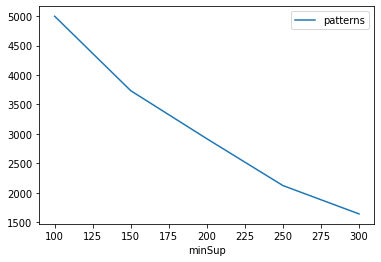

Graph for No Of Patterns is successfully generated!


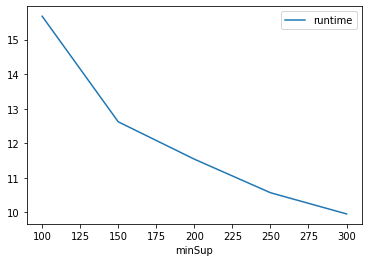

Graph for Runtime taken is successfully generated!


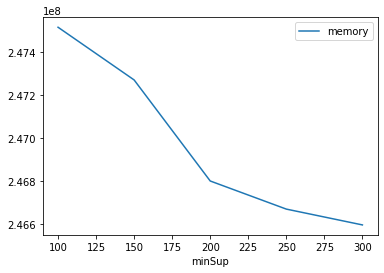

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
